<a href="https://colab.research.google.com/github/rakibhasan3948/DataMining-MachineLearning/blob/main/SmokingAndDrinkingDatasetWithBodySignal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**After implementing several algorithms on the smoking_driking_dataset_Ver01 I have got these following results-**

**Linnear Regression -**  
*   Smoker_Type = 0.37737678550554643
*   Drinker_Type = 0.37737678550554643

**Logistic Regression -**
*   Smoker_Type = 0.6769483538967078
*   Drinker_Type = 0.714241428482857

**K-Nearest Neighbor -**
*   Smoker_Type = 0.6459172918345837
*   Drinker_Type = 0.6705623411246823

**Naive Bayes -**
*   Smoker_Type = 0.6640833281666564
*   Drinker_Type = 0.6758323516647033

**Decision Tree -**
*   Smoker_Type = 0.6180172360344721
*   Drinker_Type = 0.6393452786905574

**K-Nearest Neighbor -**
*   Smoker_Type = 0.6884803769607539
*   Drinker_Type = 0.7273854547709095

# **Preprocessing**

In [126]:
import pandas as pd
df = pd.read_csv('/content/smoking_driking_dataset_Ver01.csv')
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161285,Female,45,160,55,71.0,1.0,1.0,1.0,1.0,126.0,...,109.0,57.0,13.3,1.0,0.7,15.0,9.0,16.0,1.0,Y
161286,Male,65,155,55,80.0,0.6,0.6,1.0,1.0,120.0,...,47.0,112.0,15.0,1.0,0.9,22.0,14.0,21.0,2.0,Y
161287,Female,35,160,55,80.0,0.7,0.7,1.0,1.0,110.0,...,119.0,294.0,15.1,1.0,0.9,14.0,16.0,12.0,1.0,N
161288,Female,30,150,50,63.0,0.5,0.2,1.0,1.0,99.0,...,118.0,67.0,13.2,1.0,0.7,21.0,13.0,15.0,1.0,Y


In [127]:
df.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           1
triglyceride        1
hemoglobin          1
urine_protein       1
serum_creatinine    1
SGOT_AST            1
SGOT_ALT            1
gamma_GTP           1
SMK_stat_type_cd    1
DRK_YN              1
dtype: int64

In [128]:
df.dropna(inplace = True)

In [129]:
df.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [130]:
from sklearn.preprocessing import LabelEncoder

le  = LabelEncoder()
df.DRK_YN = le.fit_transform(df.DRK_YN)
df.sex = le.fit_transform(df.sex)

In [131]:
df.DRK_YN.unique()

array([1, 0])

In [132]:
df.DRK_YN.value_counts()

0    80788
1    80501
Name: DRK_YN, dtype: int64

In [133]:
df.SMK_stat_type_cd.unique()

array([1., 3., 2.])

In [134]:
df.SMK_stat_type_cd = df.SMK_stat_type_cd.astype(int)

In [135]:
df.SMK_stat_type_cd.unique()

array([1, 3, 2])

In [136]:
df.SMK_stat_type_cd.value_counts()

1    97686
3    34958
2    28645
Name: SMK_stat_type_cd, dtype: int64

In [13]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df.iloc[:,0:22] = mms.fit_transform(df.iloc[:,0:22])

<ipython-input-13-128d76b7958e>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,0:22] = mms.fit_transform(df.iloc[:,0:22])


In [14]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1.0,0.230769,0.666667,0.434783,0.057054,0.091837,0.091837,0.0,0.0,0.286624,...,0.024424,0.009590,0.703057,0.0,0.009585,0.010471,0.014731,0.039078,1,1
1,1.0,0.153846,0.833333,0.478261,0.056017,0.081633,0.112245,0.0,0.0,0.350318,...,0.028722,0.012646,0.646288,0.0,0.008520,0.009948,0.015165,0.026052,3,0
2,1.0,0.307692,0.583333,0.434783,0.058091,0.112245,0.142857,0.0,0.0,0.286624,...,0.014263,0.010855,0.646288,0.0,0.008520,0.024084,0.013432,0.067134,1,0
3,1.0,0.461538,0.750000,0.478261,0.058091,0.142857,0.112245,0.0,0.0,0.445860,...,0.020125,0.011065,0.724891,0.0,0.010650,0.014660,0.014298,0.017034,1,0
4,1.0,0.461538,0.583333,0.304348,0.046680,0.091837,0.112245,0.0,0.0,0.401274,...,0.022665,0.010855,0.558952,0.0,0.007455,0.009424,0.004766,0.024048,1,0


# **Visualization**

In [111]:
import seaborn as srn

<Axes: >

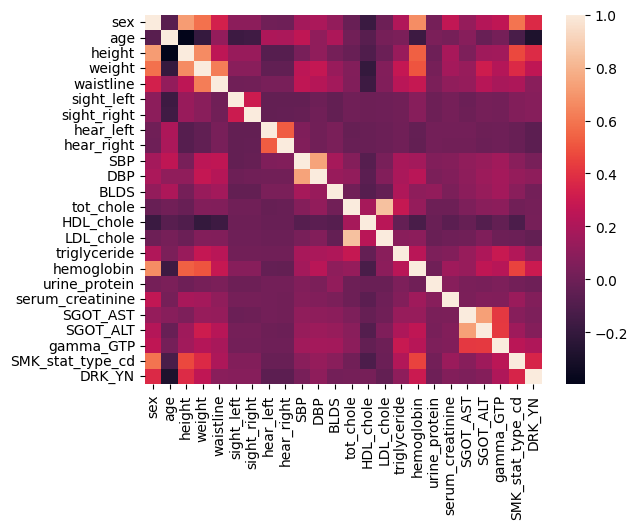

In [112]:
srn.heatmap(df.iloc[::].corr())

In [113]:
import matplotlib.pyplot as plt

# **LinearRegression**

**Smoker_Type**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
x = df.iloc[:,0:22]
y = df.SMK_stat_type_cd

In [17]:
x.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP
0,1.0,0.230769,0.666667,0.434783,0.057054,0.091837,0.091837,0.0,0.0,0.286624,...,0.088818,0.005673,0.024424,0.009590,0.703057,0.0,0.009585,0.010471,0.014731,0.039078
1,1.0,0.153846,0.833333,0.478261,0.056017,0.081633,0.112245,0.0,0.0,0.350318,...,0.111182,0.006537,0.028722,0.012646,0.646288,0.0,0.008520,0.009948,0.015165,0.026052
2,1.0,0.307692,0.583333,0.434783,0.058091,0.112245,0.142857,0.0,0.0,0.286624,...,0.052396,0.004810,0.014263,0.010855,0.646288,0.0,0.008520,0.024084,0.013432,0.067134
3,1.0,0.461538,0.750000,0.478261,0.058091,0.142857,0.112245,0.0,0.0,0.445860,...,0.093930,0.009127,0.020125,0.011065,0.724891,0.0,0.010650,0.014660,0.014298,0.017034
4,1.0,0.461538,0.583333,0.304348,0.046680,0.091837,0.112245,0.0,0.0,0.401274,...,0.092652,0.007277,0.022665,0.010855,0.558952,0.0,0.007455,0.009424,0.004766,0.024048


In [18]:
y.head()

0    1
1    3
2    1
3    1
4    1
Name: SMK_stat_type_cd, dtype: int64

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [20]:
lr = LinearRegression()
lr = lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.37737678550554643

In [21]:
lr.predict(x_test)

array([2.03004877, 2.06465218, 1.86923736, ..., 2.12321922, 1.95751151,
       2.02513057])

**Dinker_Type**

In [22]:
x = df.iloc[:,0:22]
y = df.DRK_YN

In [23]:
x.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP
0,1.0,0.230769,0.666667,0.434783,0.057054,0.091837,0.091837,0.0,0.0,0.286624,...,0.088818,0.005673,0.024424,0.009590,0.703057,0.0,0.009585,0.010471,0.014731,0.039078
1,1.0,0.153846,0.833333,0.478261,0.056017,0.081633,0.112245,0.0,0.0,0.350318,...,0.111182,0.006537,0.028722,0.012646,0.646288,0.0,0.008520,0.009948,0.015165,0.026052
2,1.0,0.307692,0.583333,0.434783,0.058091,0.112245,0.142857,0.0,0.0,0.286624,...,0.052396,0.004810,0.014263,0.010855,0.646288,0.0,0.008520,0.024084,0.013432,0.067134
3,1.0,0.461538,0.750000,0.478261,0.058091,0.142857,0.112245,0.0,0.0,0.445860,...,0.093930,0.009127,0.020125,0.011065,0.724891,0.0,0.010650,0.014660,0.014298,0.017034
4,1.0,0.461538,0.583333,0.304348,0.046680,0.091837,0.112245,0.0,0.0,0.401274,...,0.092652,0.007277,0.022665,0.010855,0.558952,0.0,0.007455,0.009424,0.004766,0.024048


In [24]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: DRK_YN, dtype: int64

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [50]:
lr = LinearRegression()
lr = lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.37737678550554643

In [51]:
lr.predict(x_test)

array([2.03004877, 2.06465218, 1.86923736, ..., 2.12321922, 1.95751151,
       2.02513057])

# **LogisticRegression**

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
x = df.iloc[:,0:22]
y = df.SMK_stat_type_cd

In [54]:
x.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP
0,1.0,0.230769,0.666667,0.434783,0.057054,0.091837,0.091837,0.0,0.0,0.286624,...,0.088818,0.005673,0.024424,0.009590,0.703057,0.0,0.009585,0.010471,0.014731,0.039078
1,1.0,0.153846,0.833333,0.478261,0.056017,0.081633,0.112245,0.0,0.0,0.350318,...,0.111182,0.006537,0.028722,0.012646,0.646288,0.0,0.008520,0.009948,0.015165,0.026052
2,1.0,0.307692,0.583333,0.434783,0.058091,0.112245,0.142857,0.0,0.0,0.286624,...,0.052396,0.004810,0.014263,0.010855,0.646288,0.0,0.008520,0.024084,0.013432,0.067134
3,1.0,0.461538,0.750000,0.478261,0.058091,0.142857,0.112245,0.0,0.0,0.445860,...,0.093930,0.009127,0.020125,0.011065,0.724891,0.0,0.010650,0.014660,0.014298,0.017034
4,1.0,0.461538,0.583333,0.304348,0.046680,0.091837,0.112245,0.0,0.0,0.401274,...,0.092652,0.007277,0.022665,0.010855,0.558952,0.0,0.007455,0.009424,0.004766,0.024048


In [55]:
y.head()

0    1
1    3
2    1
3    1
4    1
Name: SMK_stat_type_cd, dtype: int64

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [57]:
lr = LogisticRegression()
lr = lr.fit(x_train, y_train)
lr.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6769483538967078

In [58]:
lr.predict(x_test)

array([3, 3, 1, ..., 3, 2, 3])

**Dinker_Type**

In [59]:
x = df.iloc[:,0:22]
y = df.DRK_YN

In [60]:
x.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP
0,1.0,0.230769,0.666667,0.434783,0.057054,0.091837,0.091837,0.0,0.0,0.286624,...,0.088818,0.005673,0.024424,0.009590,0.703057,0.0,0.009585,0.010471,0.014731,0.039078
1,1.0,0.153846,0.833333,0.478261,0.056017,0.081633,0.112245,0.0,0.0,0.350318,...,0.111182,0.006537,0.028722,0.012646,0.646288,0.0,0.008520,0.009948,0.015165,0.026052
2,1.0,0.307692,0.583333,0.434783,0.058091,0.112245,0.142857,0.0,0.0,0.286624,...,0.052396,0.004810,0.014263,0.010855,0.646288,0.0,0.008520,0.024084,0.013432,0.067134
3,1.0,0.461538,0.750000,0.478261,0.058091,0.142857,0.112245,0.0,0.0,0.445860,...,0.093930,0.009127,0.020125,0.011065,0.724891,0.0,0.010650,0.014660,0.014298,0.017034
4,1.0,0.461538,0.583333,0.304348,0.046680,0.091837,0.112245,0.0,0.0,0.401274,...,0.092652,0.007277,0.022665,0.010855,0.558952,0.0,0.007455,0.009424,0.004766,0.024048


In [61]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: DRK_YN, dtype: int64

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [63]:
lr = LogisticRegression()
lr = lr.fit(x_train, y_train)
lr.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.714241428482857

In [64]:
lr.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1])

# **K_Nearest_NeighborsClassifier**

**Smoker_Type**

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
x = df.iloc[:,0:22]
y = df.SMK_stat_type_cd

In [67]:
x.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP
0,1.0,0.230769,0.666667,0.434783,0.057054,0.091837,0.091837,0.0,0.0,0.286624,...,0.088818,0.005673,0.024424,0.009590,0.703057,0.0,0.009585,0.010471,0.014731,0.039078
1,1.0,0.153846,0.833333,0.478261,0.056017,0.081633,0.112245,0.0,0.0,0.350318,...,0.111182,0.006537,0.028722,0.012646,0.646288,0.0,0.008520,0.009948,0.015165,0.026052
2,1.0,0.307692,0.583333,0.434783,0.058091,0.112245,0.142857,0.0,0.0,0.286624,...,0.052396,0.004810,0.014263,0.010855,0.646288,0.0,0.008520,0.024084,0.013432,0.067134
3,1.0,0.461538,0.750000,0.478261,0.058091,0.142857,0.112245,0.0,0.0,0.445860,...,0.093930,0.009127,0.020125,0.011065,0.724891,0.0,0.010650,0.014660,0.014298,0.017034
4,1.0,0.461538,0.583333,0.304348,0.046680,0.091837,0.112245,0.0,0.0,0.401274,...,0.092652,0.007277,0.022665,0.010855,0.558952,0.0,0.007455,0.009424,0.004766,0.024048


In [68]:
y.head()

0    1
1    3
2    1
3    1
4    1
Name: SMK_stat_type_cd, dtype: int64

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [71]:
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.6459172918345837

In [72]:
knn.predict(x_test)

array([1, 2, 1, ..., 2, 3, 1])

**Drinker_Type**

In [73]:
x = df.iloc[:,0:22]
y = df.DRK_YN

In [74]:
x.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP
0,1.0,0.230769,0.666667,0.434783,0.057054,0.091837,0.091837,0.0,0.0,0.286624,...,0.088818,0.005673,0.024424,0.009590,0.703057,0.0,0.009585,0.010471,0.014731,0.039078
1,1.0,0.153846,0.833333,0.478261,0.056017,0.081633,0.112245,0.0,0.0,0.350318,...,0.111182,0.006537,0.028722,0.012646,0.646288,0.0,0.008520,0.009948,0.015165,0.026052
2,1.0,0.307692,0.583333,0.434783,0.058091,0.112245,0.142857,0.0,0.0,0.286624,...,0.052396,0.004810,0.014263,0.010855,0.646288,0.0,0.008520,0.024084,0.013432,0.067134
3,1.0,0.461538,0.750000,0.478261,0.058091,0.142857,0.112245,0.0,0.0,0.445860,...,0.093930,0.009127,0.020125,0.011065,0.724891,0.0,0.010650,0.014660,0.014298,0.017034
4,1.0,0.461538,0.583333,0.304348,0.046680,0.091837,0.112245,0.0,0.0,0.401274,...,0.092652,0.007277,0.022665,0.010855,0.558952,0.0,0.007455,0.009424,0.004766,0.024048


In [75]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: DRK_YN, dtype: int64

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [77]:
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.6705623411246823

In [78]:
knn.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1])

# **NaiveBayes**

**Smoker_Type**

In [79]:
from sklearn.naive_bayes import GaussianNB

In [80]:
x = df.iloc[:,0:22]
y = df.SMK_stat_type_cd

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [87]:
nb = GaussianNB()
nb = nb.fit(x_train, y_train)
nb.score(x_test, y_test)

0.6640833281666564

In [88]:
nb.predict(x_test)

array([3, 2, 1, ..., 3, 1, 2])

**Drinker_Type**

In [89]:
x = df.iloc[:,0:22]
y = df.DRK_YN

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [91]:
nb = GaussianNB()
nb = nb.fit(x_train, y_train)
nb.score(x_test, y_test)

0.6758323516647033

In [92]:
nb.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1])

# **Decision_Tree**

**Smoker_Type**

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
x = df.iloc[:,0:22]
y = df.SMK_stat_type_cd

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [96]:
dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.6180172360344721

In [97]:
dt.predict(x_test)

array([1, 3, 2, ..., 2, 2, 3])

**Drinker_Type**

In [98]:
x = df.iloc[:,0:22]
y = df.DRK_YN

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [100]:
dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.6393452786905574

In [101]:
dt.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1])

# **Randomforest**

**Smoker_Type**

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
x = df.iloc[:,0:22]
y = df.SMK_stat_type_cd

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [105]:
rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.6884803769607539

In [106]:
rf.predict(x_test)

array([3, 2, 1, ..., 3, 2, 1])

**Drinker_Type**

In [107]:
x = df.iloc[:,0:22]
y = df.DRK_YN

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [109]:
rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.7273854547709095

In [110]:
rf.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1])